# importing libraries

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [23]:
# loading the csv data to pandas data frame
gold_data = pd.read_csv('gld_price_data.csv')

In [24]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [25]:
# print the last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [26]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [27]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [28]:
# cheaking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [29]:
# getting some statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# correlation 

## positive correlation 

## negative correlation 

In [30]:
correlation = gold_data.corr()

<AxesSubplot:>

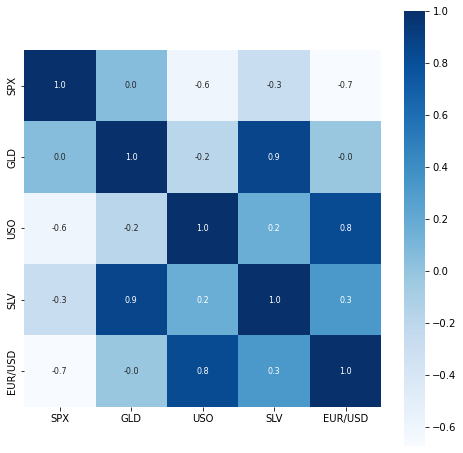

In [31]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [32]:
# correlation value of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/home/absurd/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

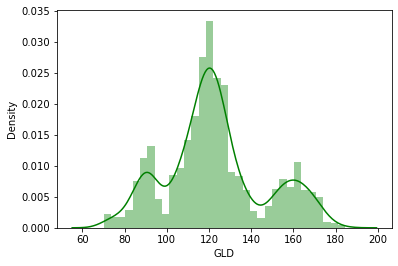

In [35]:
# cheaking the distribution of GLD price
sns.distplot(gold_data['GLD'], color='green')

# splitting the features and target

In [38]:
x = gold_data.drop(['Date','GLD'], axis=1)
y = gold_data['GLD']

In [39]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [40]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [41]:
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=2)

# model training ; random forest regressor

In [42]:
regressor = RandomForestRegressor(n_estimators=100)

In [43]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

# model evaluation

In [44]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [45]:
print(test_data_prediction)

[168.72980024  82.0096999  116.02480046 127.70740042 120.78670096
 154.60509688 149.92349878 126.25329985 117.55429854 126.03740044
 116.67160062 172.70060068 141.00519766 167.72429854 115.14329998
 117.22870057 138.2630034  170.26150086 159.68630241 160.8591993
 154.72480034 125.65330004 176.50720012 157.00580311 125.22490033
  93.82219971  77.69140002 120.73099998 119.11989951 167.35500057
  88.04700101 125.18910013  91.15320088 117.61780063 121.21319928
 136.83700108 115.51420115 115.2695009  148.3992996  107.24530085
 104.51320266  87.15329814 126.62020035 118.12589956 152.49639909
 120.00169964 108.36369977 107.84169818  93.00159977 127.0316977
  74.73670069 113.62279911 121.33420034 111.34709916 118.96289905
 120.79509919 159.44859948 167.8290009  147.09149655  85.89039843
  94.26310014  86.75069843  90.62130032 119.00540052 126.57290057
 127.5684998  170.71420062 122.21009926 117.58759877  98.42540061
 168.2807012  142.92069798 132.25750287 121.1805021  120.75079939
 119.7746003

# model evaluation

In [47]:
# r squared error 
error_score = metrics.r2_score(y_test , test_data_prediction)
print('r squared error', error_score)

r squared error 0.9890893023274232


# comparing the actual values with predicted values

In [48]:
y_test = list(y_test)

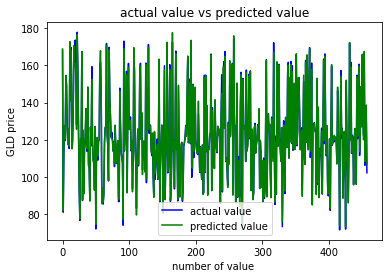

In [49]:
plt.plot(y_test,color= 'blue', label = 'actual value')
plt.plot(test_data_prediction, color = 'green' , label = 'predicted value')
plt.title('actual value vs predicted value')
plt.xlabel('number of value ')
plt.ylabel('GLD price')
plt.legend()
plt.show()